<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part8/P8_Ch08_CH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컬러사진 흑백으로 변형하기

- AutoEncoder 방식 접근
- PFCN dataset
https://www.researchgate.net/figure/Sample-images-from-the-PFCN-dataset_fig4_334417334

- 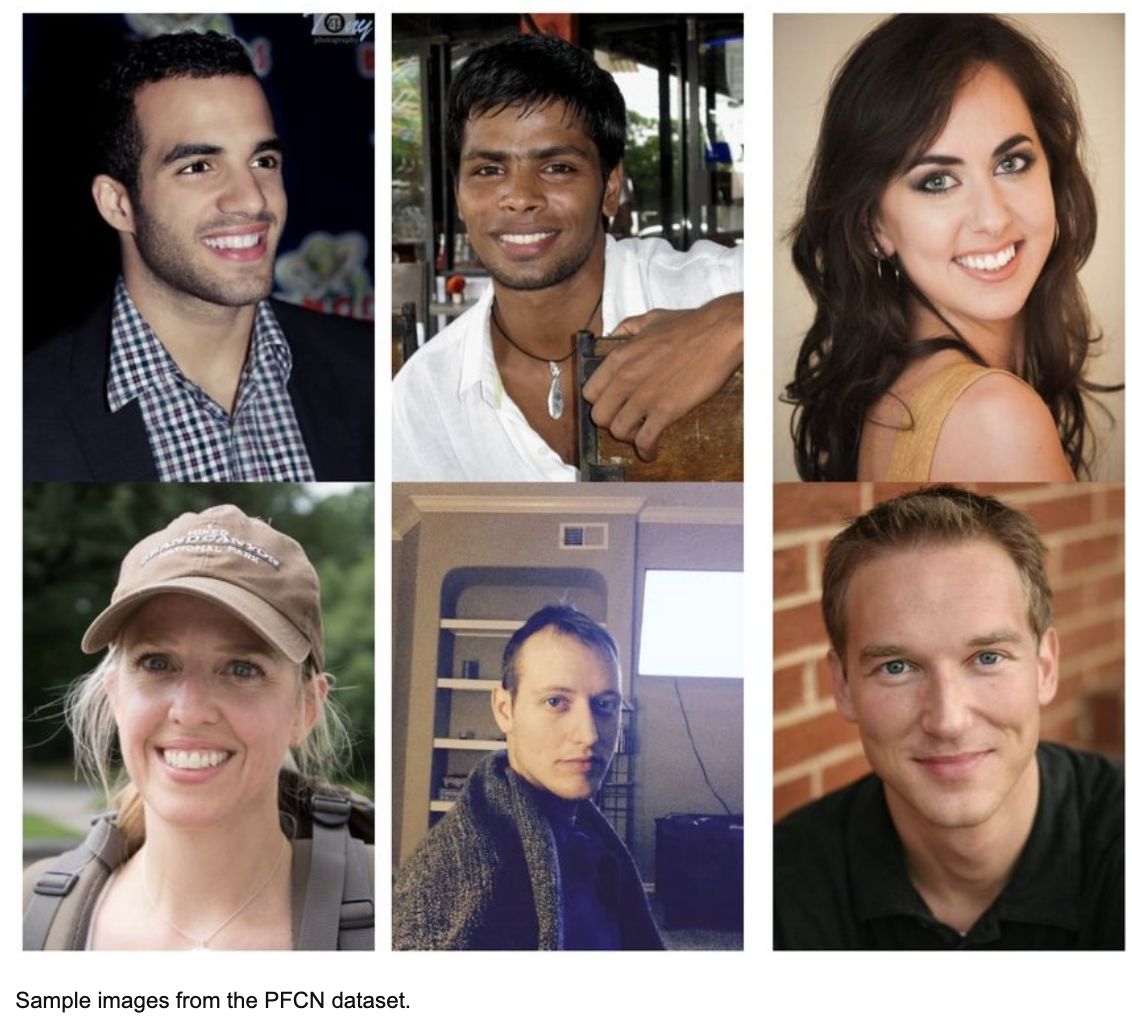


In [2]:
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# 1. EDA

In [4]:
pfcn_small = np.load('/gdrive/MyDrive/딥러닝_정주행/P8_Ch02.인물사진에서배경없애기/pfcn_small.npz')

In [5]:
list(pfcn_small.keys())

['train_images', 'test_images', 'train_mattes', 'test_mattes']

In [6]:
train_images = pfcn_small['train_images']
test_images = pfcn_small['test_images']

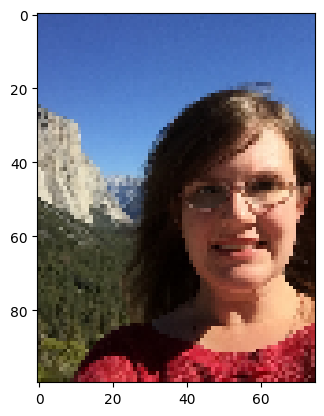

In [7]:
plt.imshow(train_images[0])

In [8]:
train_images[train_images != 0][:10]

array([0.23627451, 0.34803922, 0.64705882, 0.24509804, 0.35686275,
       0.65588235, 0.25490196, 0.36470588, 0.66470588, 0.2372549 ])

In [11]:
print(train_images.dtype)
print(test_images.dtype)
print(train_images.shape)
print(test_images.shape)

float64
float64
(1700, 100, 75, 3)
(300, 100, 75, 3)


In [12]:
print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

0.0 1.0
0.0 1.0


In [14]:
from skimage import color
print(train_images[0].shape)
print(color.rgb2gray(train_images[0]).shape)

(100, 75, 3)
(100, 75)


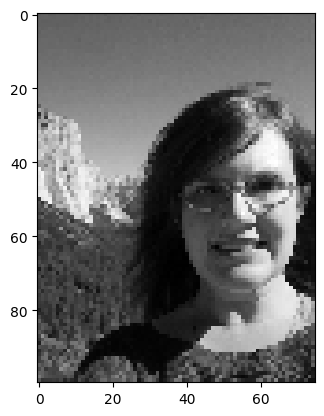

In [16]:
plt.imshow(color.rgb2gray(train_images[0]), cmap ='gray')

In [17]:
train_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in train_images])
test_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in test_images])


print(train_gray_images.shape, test_gray_images.shape)

(1700, 100, 75, 1) (300, 100, 75, 1)
